<a href="https://colab.research.google.com/github/chibest14/Covid-19-project/blob/main/Covid_19_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Reading the dataset into the DataFrame
df_covid = pd.read_csv('/content/full_grouped.csv')
df_covid

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa


#Data Preprocessing
Data preprocessing is essential for ensuring model reliability.
This involves addressing missing values, normalizing data, and creating relevant features.

In [3]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


In [4]:
# change the Date to Datetime
df_covid['Date'] = pd.to_datetime(df_covid['Date'])
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            35156 non-null  datetime64[ns]
 1   Country/Region  35156 non-null  object        
 2   Confirmed       35156 non-null  int64         
 3   Deaths          35156 non-null  int64         
 4   Recovered       35156 non-null  int64         
 5   Active          35156 non-null  int64         
 6   New cases       35156 non-null  int64         
 7   New deaths      35156 non-null  int64         
 8   New recovered   35156 non-null  int64         
 9   WHO Region      35156 non-null  object        
dtypes: datetime64[ns](1), int64(7), object(2)
memory usage: 2.7+ MB


In [5]:
# check for duplicate entries
df_covid.duplicated().sum()

0

In [6]:
# check for columns in the dataFrame with type string
df_covid.select_dtypes(include='object').columns

Index(['Country/Region', 'WHO Region'], dtype='object')

The Result Above shows we have no duplicate values and we have no missing values, As the Dataset consist of columns with 35156 non-null entries \
  Also we have to make sure each column is in the right data type, The reason we had to convert Date from object to datetime, and the Country/Region and WHO Region are object type while other clumns are int64 which represent integer values.

In [7]:
df_covid.describe()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
count,35156,3.515600e+04,35156.000000,3.515600e+04,3.515600e+04,35156.00000,35156.000000,35156.000000
mean,2020-04-24 12:00:00,2.356663e+04,1234.068239,1.104813e+04,1.128443e+04,469.36375,18.603339,269.315593
min,2020-01-22 00:00:00,0.000000e+00,0.000000,0.000000e+00,-2.000000e+00,0.00000,-1918.000000,-16298.000000
25%,2020-03-08 18:00:00,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000
50%,2020-04-24 12:00:00,2.500000e+02,4.000000,3.300000e+01,8.500000e+01,2.00000,0.000000,0.000000
75%,2020-06-10 06:00:00,3.640250e+03,78.250000,1.286250e+03,1.454000e+03,75.00000,1.000000,20.000000
max,2020-07-27 00:00:00,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,77255.00000,3887.000000,140050.000000
std,NaN,1.499818e+05,7437.238354,6.454640e+04,8.997149e+04,3005.86754,115.706351,2068.063852


In [8]:
# check for negative values in the int and float columns
df_covid.select_dtypes(include=['int64', 'float64']).lt(0).sum()

,0
Confirmed,0
Deaths,0
Recovered,0
Active,2
New cases,0
New deaths,38
New recovered,77


We observe we had nagative values from our discriptive statistics, which is not consistent with the Data since we are dealing with people here. \
we used a code to check the number of nagative values we had we found that we had 2 nagative values in the Active column, 38 nagative values in New deaths column and 77 nagative value in New recovered column. \

To know what we are going to fill the nagative values with we will need to know the distribution of the data we want to fill. we fill Normal distribution with the mean while a skewed distribution is filled with the median.

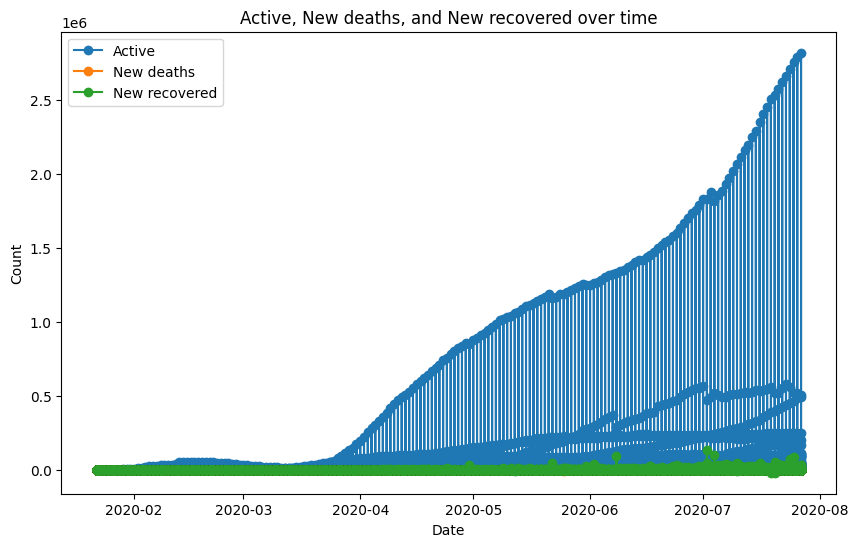

In [9]:
# plot Active, New deaths and New recovered on Date
plt.figure(figsize=(10, 6))
plt.plot(df_covid['Date'], df_covid['Active'],
         marker='o', linestyle='-', label='Active')
plt.plot(df_covid['Date'], df_covid['New deaths'],
         marker='o', linestyle='-', label='New deaths')
plt.plot(df_covid['Date'], df_covid['New recovered'],
         marker='o', linestyle='-', label='New recovered')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Active, New deaths, and New recovered over time')
plt.legend()
plt.show()

# filling Nagative values
we are going to use the median to fill all the negative values since our data doesn't follow a normal distribution

In [10]:
# filling all Negative values in Active, New deaths and New recovered
df_covid['Active'] = df_covid['Active'].apply(lambda x: df_covid['Active'].median() if x < 0 else x)
df_covid['New deaths'] = df_covid['New deaths'].apply(lambda x: df_covid['New deaths'].median() if x < 0 else x)
df_covid['New recovered'] = df_covid['New recovered'].apply(lambda x: df_covid['New recovered'].median() if x < 0 else x)
df_covid.select_dtypes(include=['int64', 'float64']).lt(0).sum()

,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
New cases,0
New deaths,0
New recovered,0


In [11]:
df_covid.describe()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
count,35156,3.515600e+04,35156.000000,3.515600e+04,3.515600e+04,35156.00000,35156.000000,35156.000000
mean,2020-04-24 12:00:00,2.356663e+04,1234.068239,1.104813e+04,1.128443e+04,469.36375,18.668051,270.482620
min,2020-01-22 00:00:00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000
25%,2020-03-08 18:00:00,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000
50%,2020-04-24 12:00:00,2.500000e+02,4.000000,3.300000e+01,8.500000e+01,2.00000,0.000000,0.000000
75%,2020-06-10 06:00:00,3.640250e+03,78.250000,1.286250e+03,1.454000e+03,75.00000,1.000000,20.000000
max,2020-07-27 00:00:00,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,77255.00000,3887.000000,140050.000000
std,NaN,1.499818e+05,7437.238354,6.454640e+04,8.997149e+04,3005.86754,115.236717,2064.310734


# EDA Report
Exploring our dataFrame for some insight

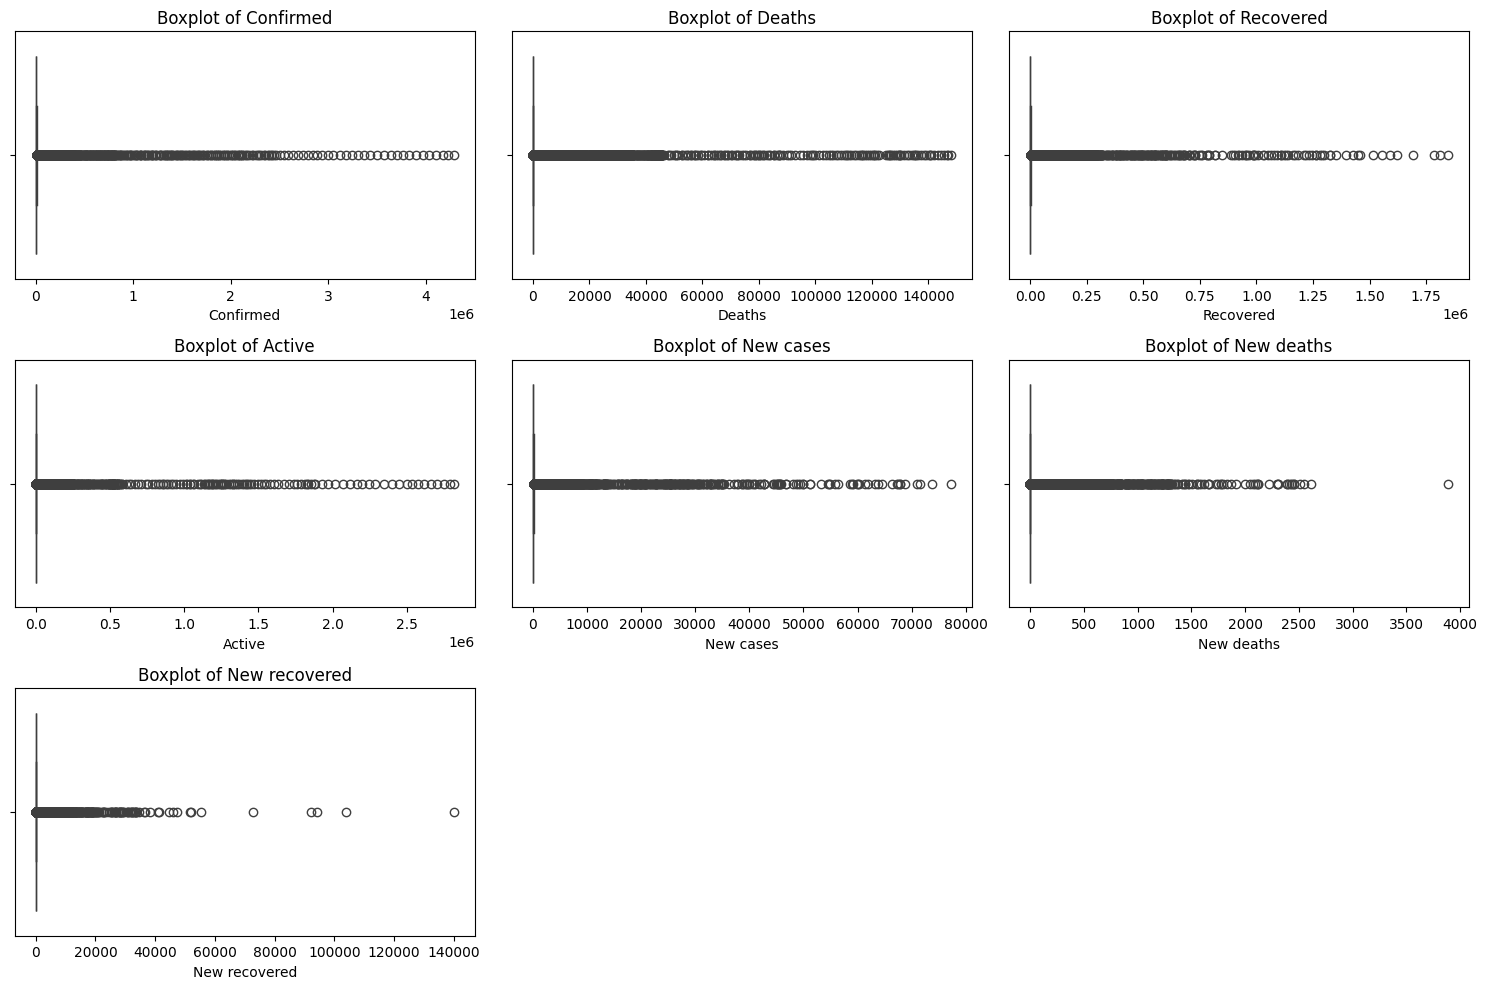

In [12]:
#Boxplots for all numerical variables to check for outliers
#list of numerical colums in the dataset
numerical_columns = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered']
#Set the figure size
plt.figure(figsize=(15, 10))
# Create a boxplot for each numerical column
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df_covid[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

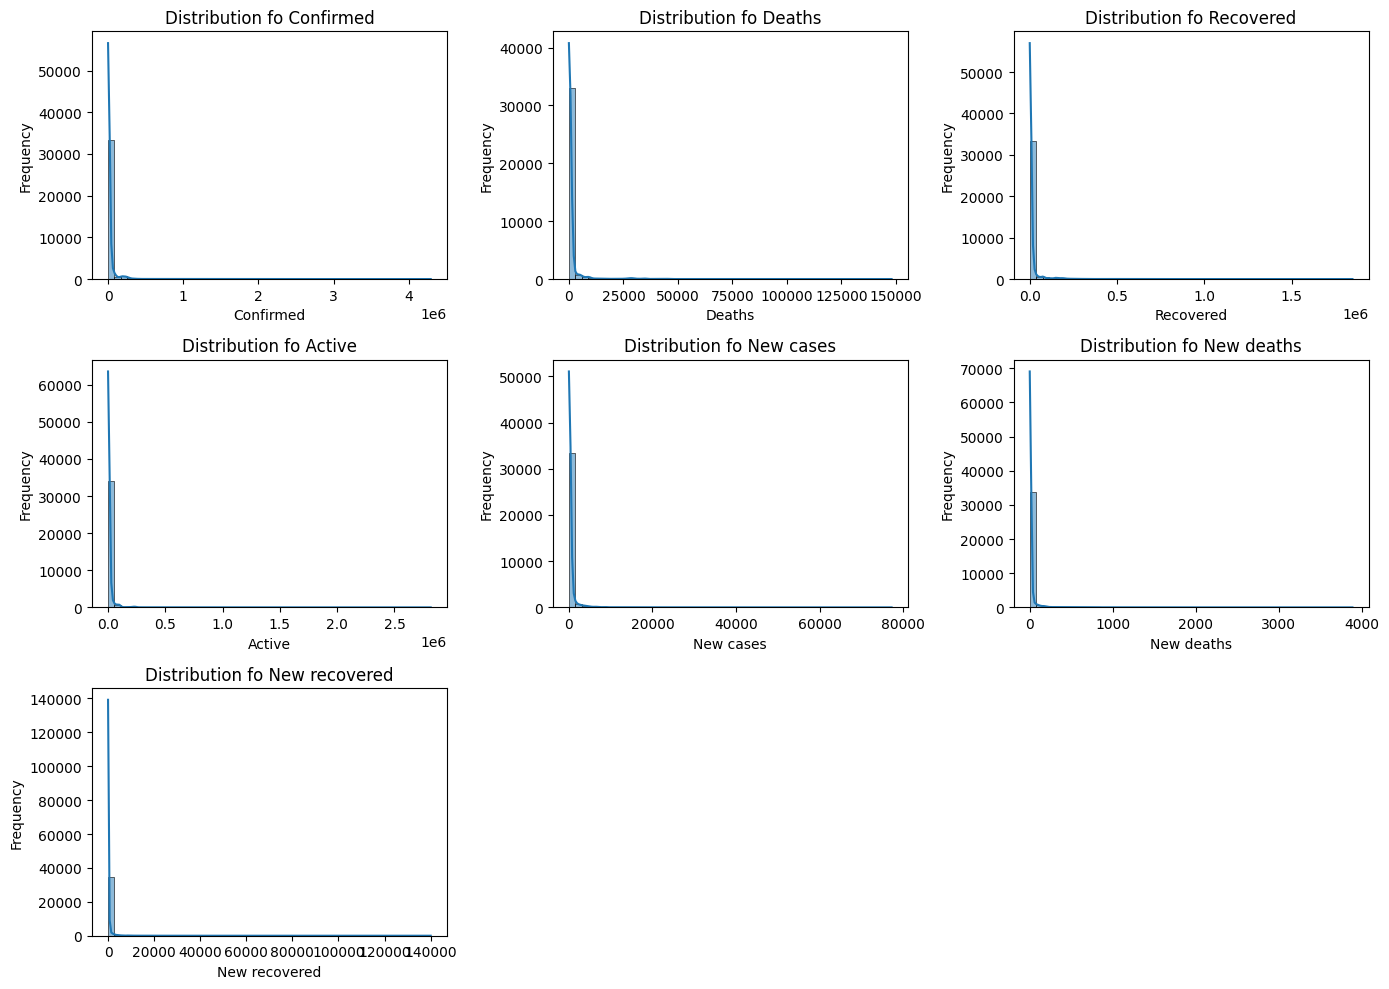

In [13]:
#Set the figure size
plt.figure(figsize=(14, 10))

#loop through the numerical columns and plot their histograms
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i) # 3 rows, 3 colums of subplots
    sns.histplot(df_covid[column], kde=True, bins=50)
    plt.title(f'Distribution fo {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Th histograms confirms what the boxplots are indicating that we have outlier in all features.

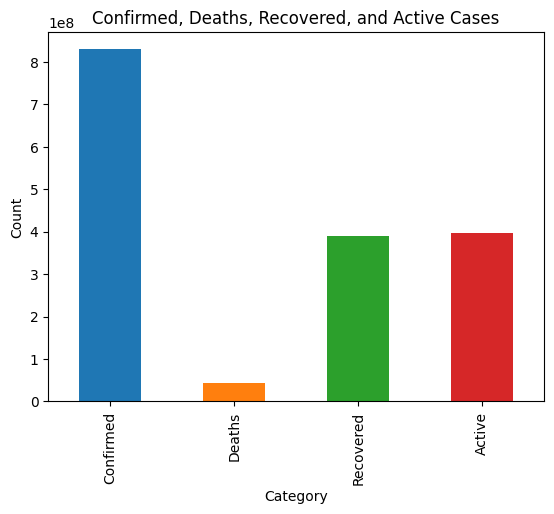

In [14]:
# ploting confirmed , deaths, recovered and active.
colors = plt.cm.tab10.colors
column_names = ['Confirmed', 'Deaths', 'Recovered', 'Active']
df_covid[column_names].sum().plot(kind='bar', color=colors)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Confirmed, Deaths, Recovered, and Active Cases')
plt.show()

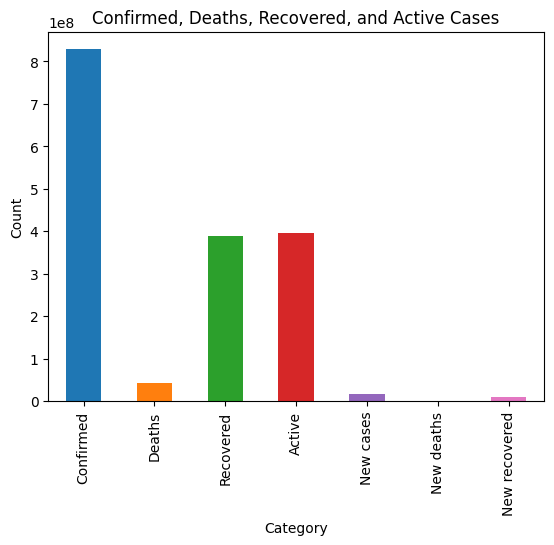

In [15]:
# ploting all numerical columns
df_covid[numerical_columns].sum().plot(kind='bar', color=colors)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Confirmed, Deaths, Recovered, and Active Cases')
plt.show()


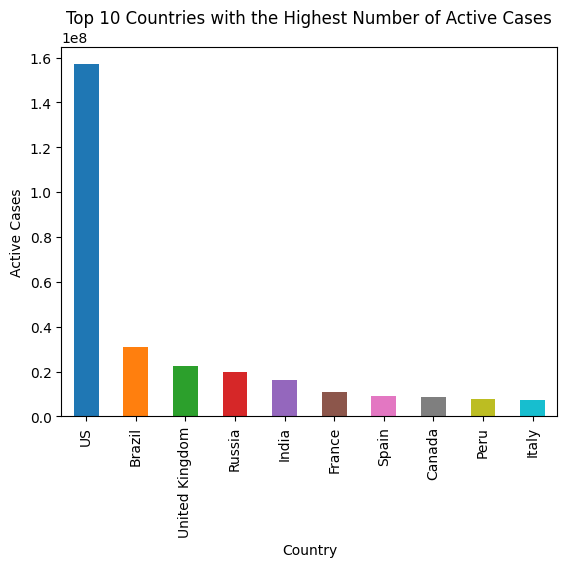

In [16]:
# Top 10 country with the highest number of Active cases
country_active = df_covid.groupby('Country/Region')['Active'].sum().sort_values(ascending=False).head(10)
country_active.plot(kind='bar', color=colors)
plt.xlabel('Country')
plt.ylabel('Active Cases')
plt.title('Top 10 Countries with the Highest Number of Active Cases')
plt.show()

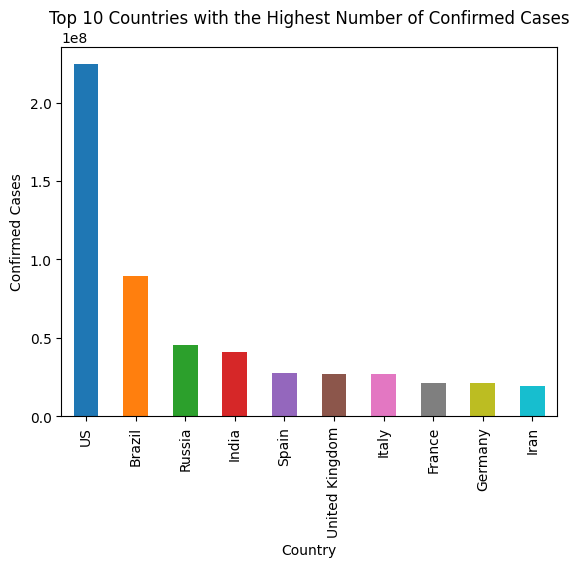

In [17]:
# Top 10 country with the highest number of Confirmed cases
country_active = df_covid.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False).head(10)
country_active.plot(kind='bar', color=colors)
plt.xlabel('Country')
plt.ylabel('Confirmed Cases')
plt.title('Top 10 Countries with the Highest Number of Confirmed Cases')
plt.show()

In [18]:
# Top 10 countries with the highest number deaths
country_deaths = df_covid.groupby('Country/Region')['Deaths'].sum().sort_values(ascending=False).head(10)
country_deaths

,Deaths
Country/Region,
US,11011411
United Kingdom,3997775
Brazil,3938034
Italy,3707717
France,3048524
Spain,3033030
Mexico,1728277
India,1111831
Iran,1024136


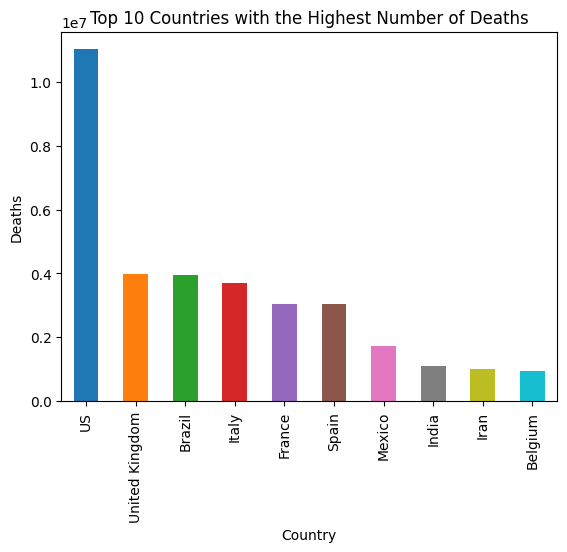

In [19]:
# Top 10 countries with the highest number of deaths
country_deaths = df_covid.groupby('Country/Region')['Deaths'].sum().sort_values(ascending=False).head(10)
country_deaths.plot(kind='bar', color=colors)
plt.xlabel('Country')
plt.ylabel('Deaths')
plt.title('Top 10 Countries with the Highest Number of Deaths')
plt.show()

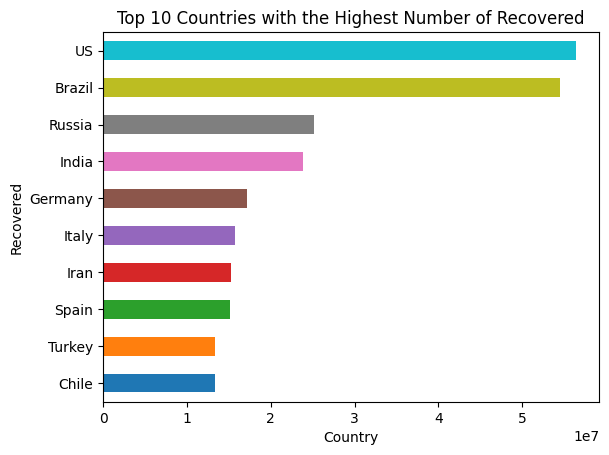

In [20]:
# Top 10 country with the highest number of recovered
country_recovered = df_covid.groupby('Country/Region')['Recovered'].sum().sort_values(ascending=False).head(10)
# Sort the values in descending order
country_recovered = country_recovered.sort_values(ascending=True)  # Change to ascending=True
country_recovered.plot(kind='barh', color=colors)
plt.xlabel('Country')
plt.ylabel('Recovered')
plt.title('Top 10 Countries with the Highest Number of Recovered')
plt.show()

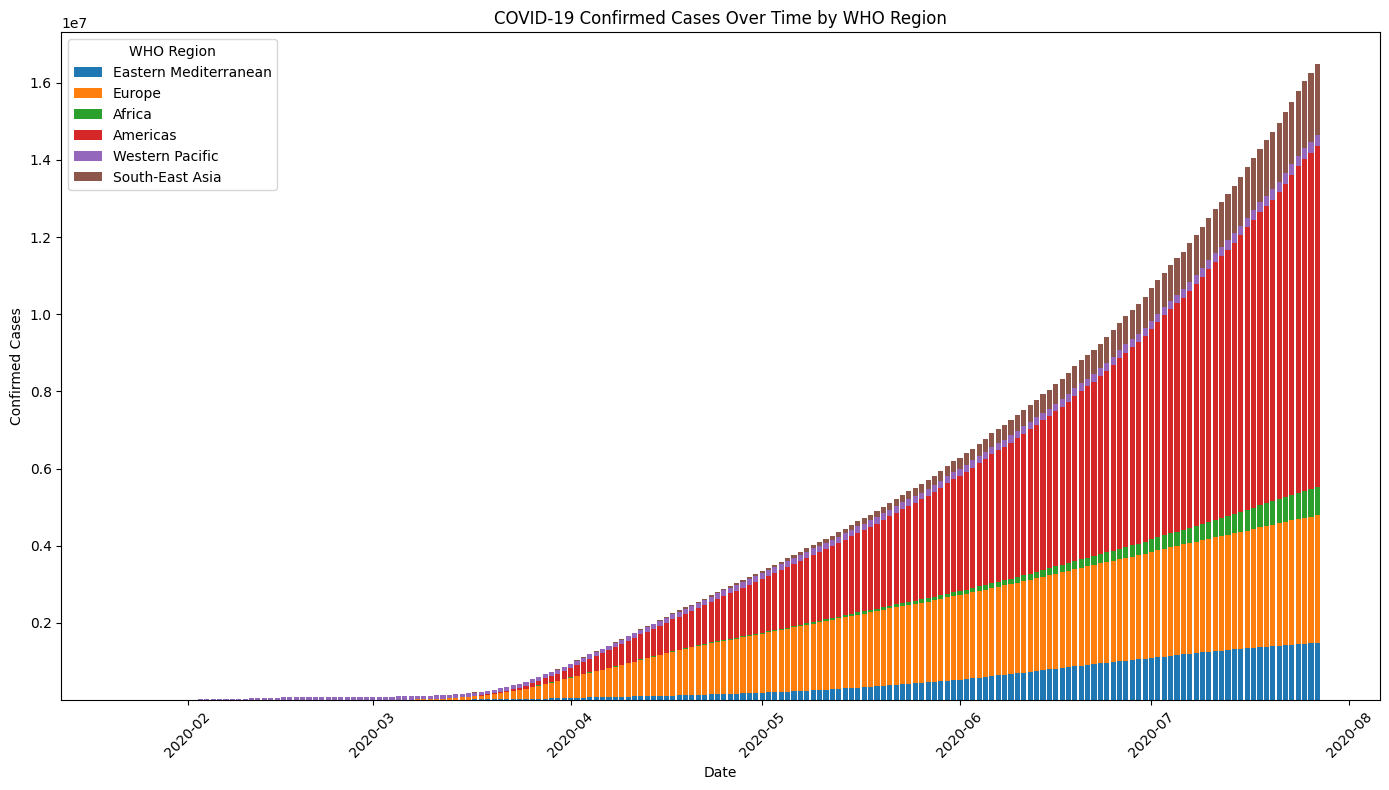

In [21]:
#stacked bar, showing overall Trend of confirmed cases over time
plt.figure(figsize=(14, 8))
regions = df_covid['WHO Region'].unique()
dates = df_covid['Date'].unique()

region_data = {}
for region in regions:
    region_data[region] = df_covid[df_covid['WHO Region'] == region].groupby('Date')['Confirmed'].sum().values

bottom = [0] * len(dates)  # Initialize bottom for stacking

for region in regions:
    plt.bar(dates, region_data[region], label=region, bottom=bottom)
    bottom += region_data[region]  # Update bottom for next region

plt.title('COVID-19 Confirmed Cases Over Time by WHO Region')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend(title='WHO Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

the stacked bar chart provides a visual representation of the cumulative confirmed COVID-19 cases over time, broken down by WHO region. It helps in understanding the overall trend, regional contributions, and comparisons between different regions.

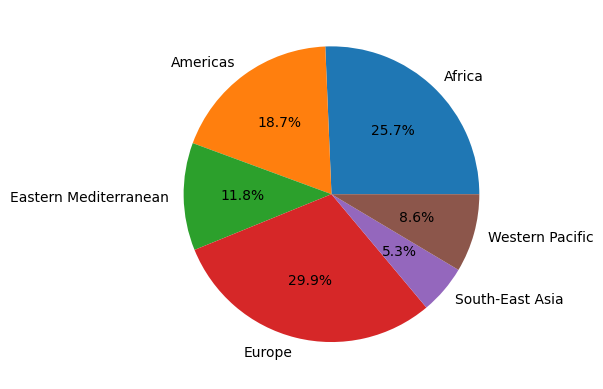

In [22]:
# WHO Regions with higher  percent Deaths
pp = df_covid.groupby('WHO Region')['Deaths'].count()
plt.pie(pp, labels=pp.index, autopct='%1.1f%%')
plt.show()

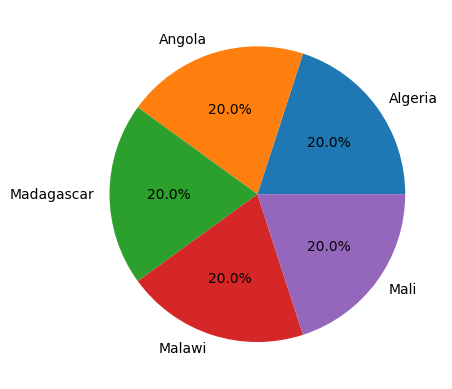

In [23]:
pp = df_covid[df_covid['WHO Region']=='Africa'].groupby('Country/Region')['Deaths'].count().sort_values(ascending=False).head(5)
plt.pie(pp, labels=pp.index, autopct='%1.1f%%')
plt.show()

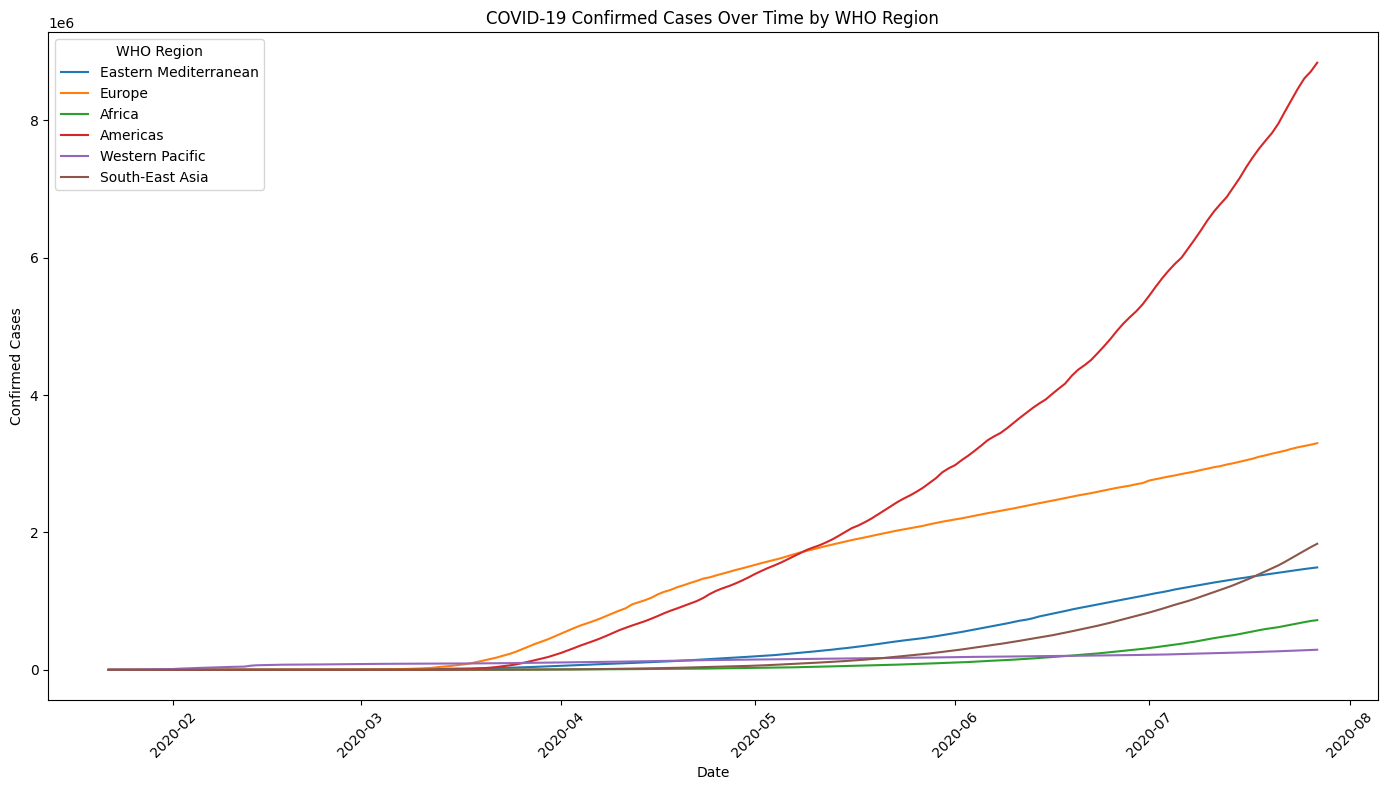

In [24]:
plt.figure(figsize=(14, 8))
regions = df_covid['WHO Region'].unique()

for region in regions:
    region_data = df_covid[df_covid['WHO Region'] == region].groupby('Date')['Confirmed'].sum()
    plt.plot(region_data, label=region)

plt.title('COVID-19 Confirmed Cases Over Time by WHO Region')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend(title='WHO Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
# Calculate daily growth rates
growth_features = ['Confirmed', 'Deaths', 'Recovered', 'Active']

for col in growth_features:
    df_covid[f'{col}_daily_growth'] = df_covid[col].diff() / df_covid[col].shift(1)

# Calculate mortality ratio
df_covid['mortality_ratio'] = df_covid['Deaths'] / df_covid['Confirmed']

# Calculate recovery ratio
df_covid['recovery_ratio'] = df_covid['Recovered'] / df_covid['Confirmed']

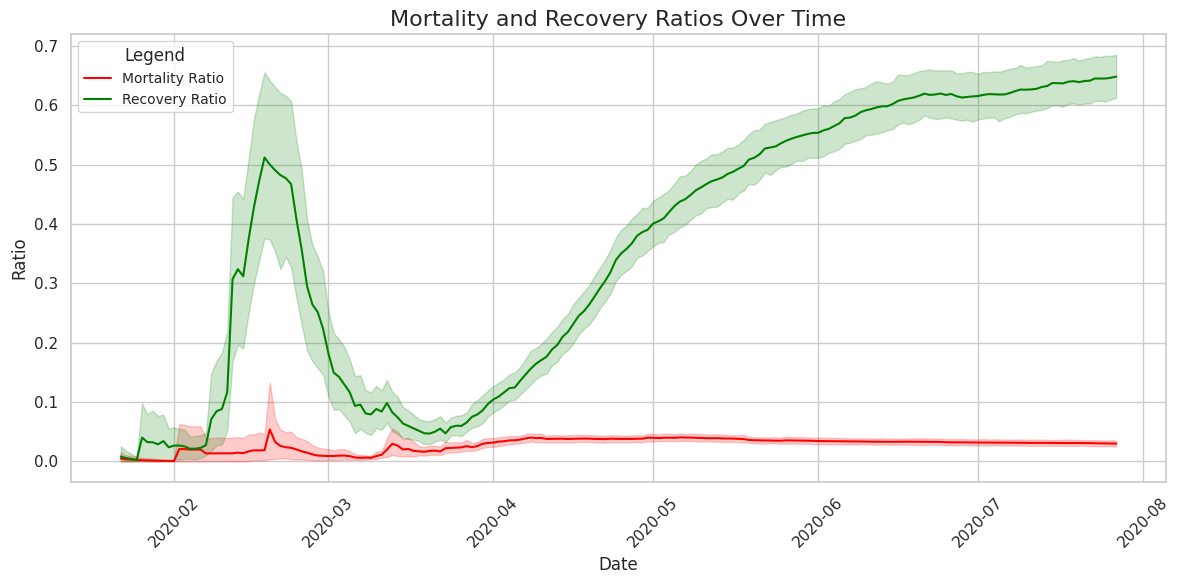

In [26]:
# Set Seaborn style
sns.set(style='whitegrid')

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='mortality_ratio', data=df_covid, label='Mortality Ratio', color='red')
sns.lineplot(x='Date', y='recovery_ratio', data=df_covid, label='Recovery Ratio', color='green')

# Add titles and labels
plt.title('Mortality and Recovery Ratios Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Ratio', fontsize=12)

# Add legend and grid
plt.legend(title='Legend', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Feature Engineering
Create new features that can improve performance and help reveal trends.

- **Daily Growth Rate:** Calculate daily growth as the rate of change for cases and deaths.
- **Rolling Average:** Smooth out day-to-day fluctuations with a 7-day rolling average.

In [27]:
# Daily growth rate of new casas
df_covid['Daily Growth Rate'] = df_covid['New cases'].pct_change() * 100
# 7-day rolling avarage for new cases, deaths and recoveries
df_covid['New Cases MA7'] = df_covid['New cases'].rolling(window=7).mean()
df_covid['New deaths MA7'] = df_covid['New deaths'].rolling(window=7).mean()
df_covid['New recovered MA7'] = df_covid['New recovered'].rolling(window=7).mean()

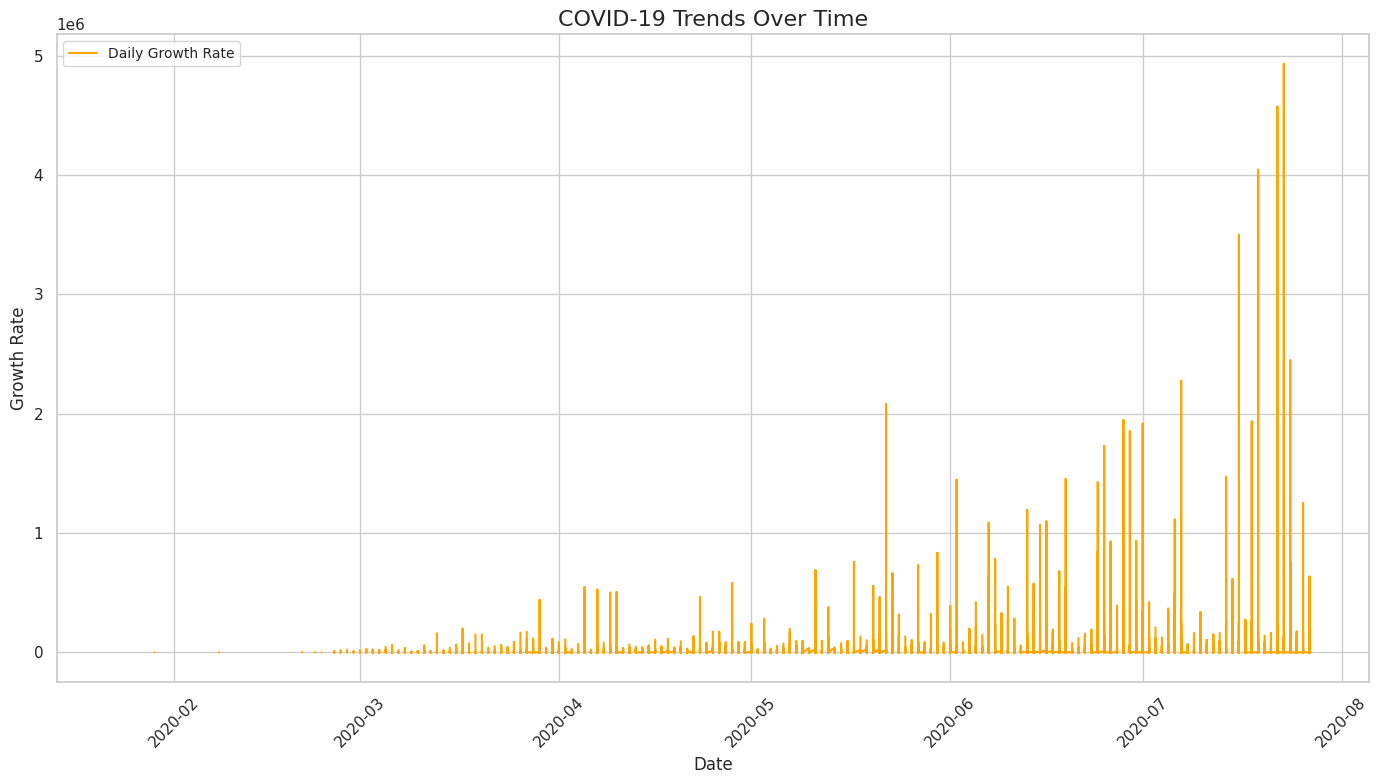

In [28]:
plt.figure(figsize=(14, 8))

# Plot daily growth rate
plt.plot(df_covid['Date'], df_covid['Daily Growth Rate'], label='Daily Growth Rate', color='orange')

# Customize the plot
plt.title('COVID-19 Trends Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Growth Rate', fontsize=12)  # Adjust y-axis label
plt.legend(fontsize=10)
plt.xticks(rotation=45)
plt.grid(True)  # Add grid for better readability

# Display the plot
plt.tight_layout()
plt.show()

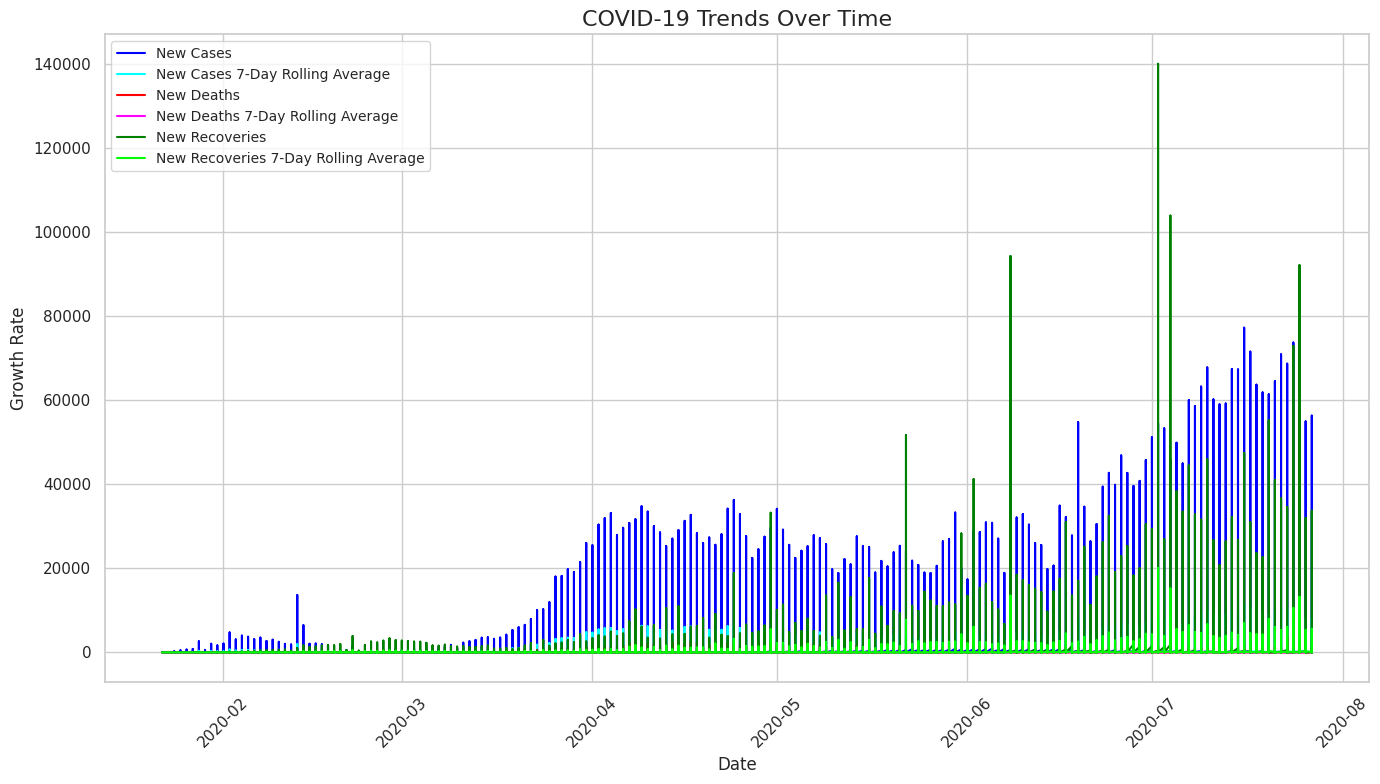

In [29]:
plt.figure(figsize=(14, 8))
# Plot new cases and its 7-day rolling average
plt.plot(df_covid['Date'], df_covid['New cases'], label='New Cases', color='blue')
plt.plot(df_covid['Date'], df_covid['New Cases MA7'], label='New Cases 7-Day Rolling Average', color='cyan')

# Plot new deaths and its 7-day rolling average
plt.plot(df_covid['Date'], df_covid['New deaths'], label='New Deaths', color='red')
plt.plot(df_covid['Date'], df_covid['New deaths MA7'], label='New Deaths 7-Day Rolling Average', color='magenta')

# Plot new recovered and its 7-day rolling average
plt.plot(df_covid['Date'], df_covid['New recovered'], label='New Recoveries', color='green')
plt.plot(df_covid['Date'], df_covid['New recovered MA7'], label='New Recoveries 7-Day Rolling Average', color='lime')

# Customize the plot
plt.title('COVID-19 Trends Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Growth Rate', fontsize=12)  # Adjust y-axis label
plt.legend(fontsize=10)
plt.xticks(rotation=45)
plt.grid(True)  # Add grid for better readability

# Display the plot
plt.tight_layout()
plt.show()


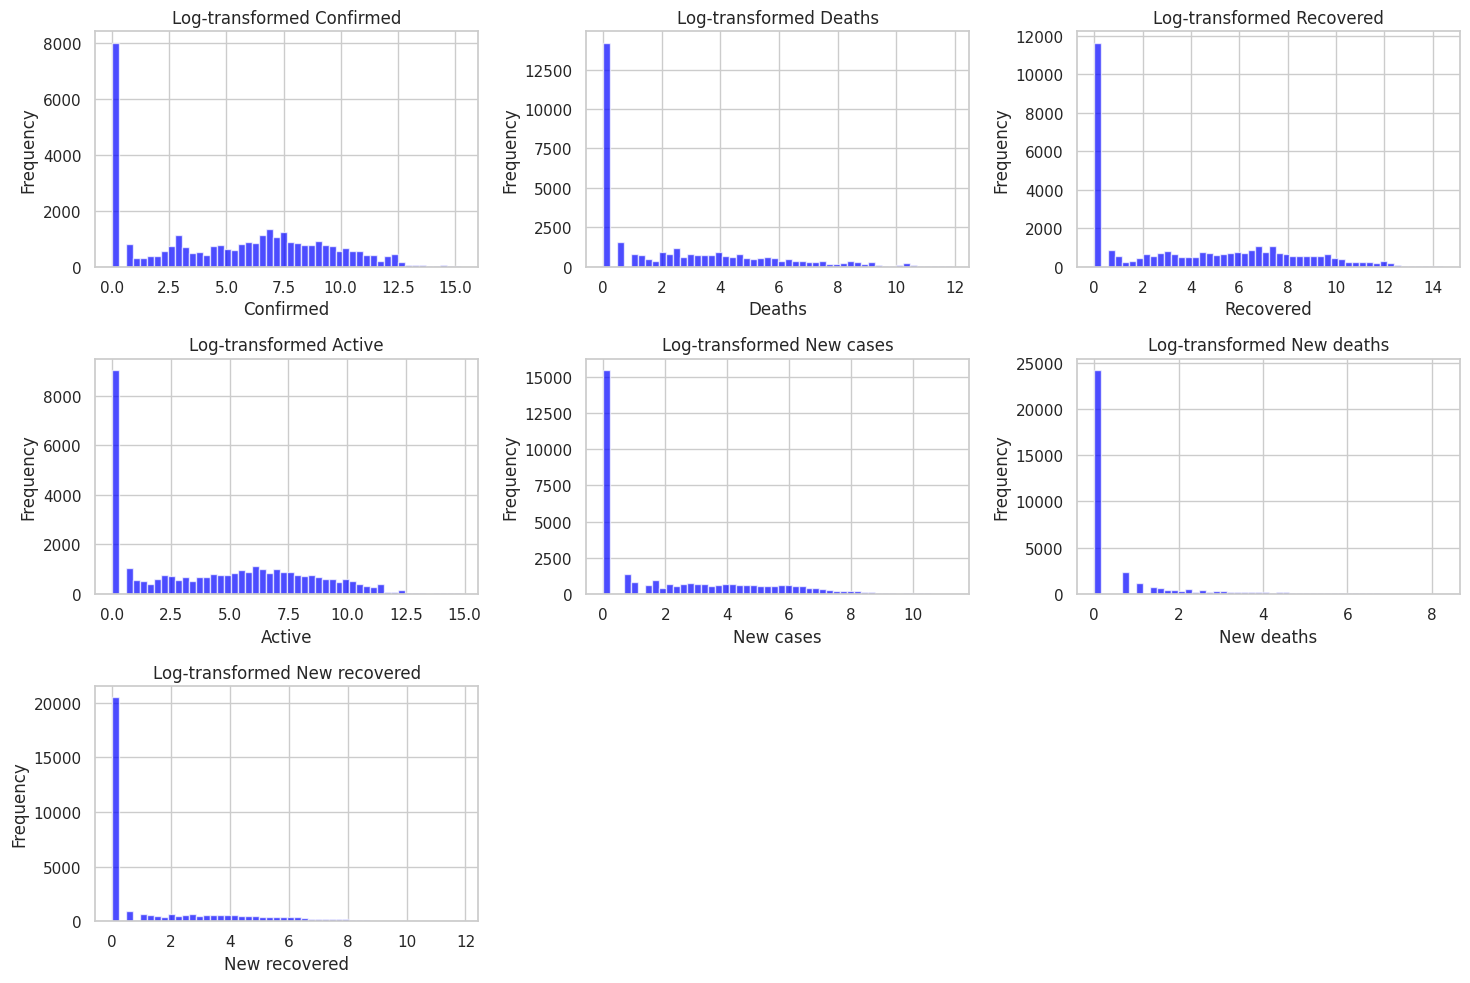

In [30]:
# Apply log transformation to selected columns
log_transformed_columns = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered']
for col in log_transformed_columns:
    df_covid[f'log_{col}'] = np.log1p(df_covid[col])  # log1p handles zeros by adding 1 before log

# Plot the log-transformed data
plt.figure(figsize=(15, 10))
for i, col in enumerate(log_transformed_columns):
    plt.subplot(3, 3, i + 1)
    plt.hist(df_covid[f'log_{col}'], bins=50, color='blue', alpha=0.7)
    plt.title(f'Log-transformed {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

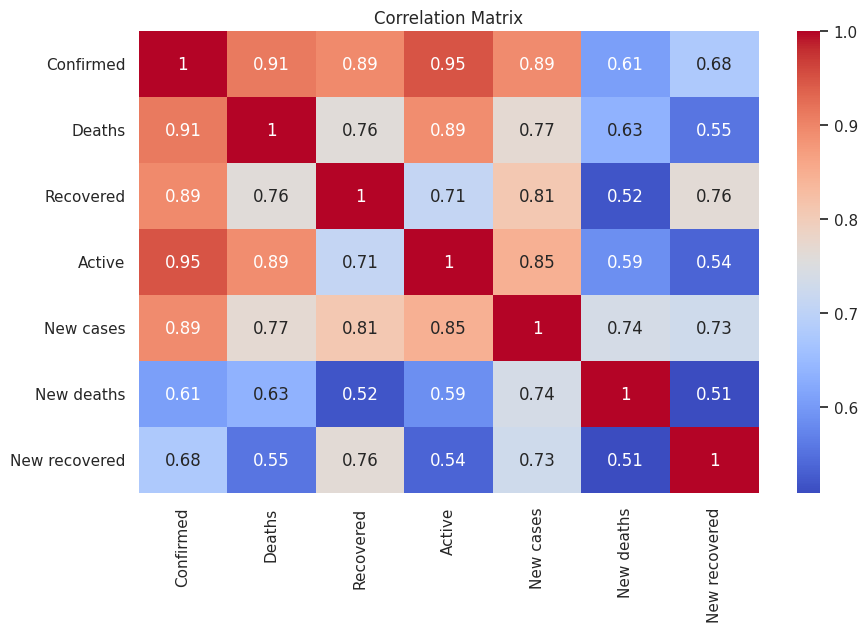

In [31]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
# Calculate the correlation matrix from the DataFrame 'df_covid' using the specified columns
correlation_matrix = df_covid[log_transformed_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [32]:
from sklearn.preprocessing import StandardScaler
#standardizing the log transformed columns
scaler = StandardScaler()
df_covid[log_transformed_columns] = scaler.fit_transform(df_covid[log_transformed_columns])
df_covid.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,...,New Cases MA7,New deaths MA7,New recovered MA7,log_Confirmed,log_Deaths,log_Recovered,log_Active,log_New cases,log_New deaths,log_New recovered
0,2020-01-22,Afghanistan,-0.157132,-0.165933,-0.171168,-0.125424,-0.156151,-0.162,-0.13103,Eastern Mediterranean,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-22,Albania,-0.157132,-0.165933,-0.171168,-0.125424,-0.156151,-0.162,-0.13103,Europe,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-22,Algeria,-0.157132,-0.165933,-0.171168,-0.125424,-0.156151,-0.162,-0.13103,Africa,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-22,Andorra,-0.157132,-0.165933,-0.171168,-0.125424,-0.156151,-0.162,-0.13103,Europe,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-22,Angola,-0.157132,-0.165933,-0.171168,-0.125424,-0.156151,-0.162,-0.13103,Africa,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
df_covid.describe()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Confirmed_daily_growth,Deaths_daily_growth,...,New Cases MA7,New deaths MA7,New recovered MA7,log_Confirmed,log_Deaths,log_Recovered,log_Active,log_New cases,log_New deaths,log_New recovered
count,35156,3.515600e+04,3.515600e+04,3.515600e+04,3.515600e+04,3.515600e+04,3.515600e+04,3.515600e+04,2.904600e+04,2.440000e+04,...,35150.000000,35150.000000,35150.000000,35156.000000,35156.000000,35156.000000,35156.000000,35156.000000,35156.000000,35156.000000
mean,2020-04-24 12:00:00,-1.293513e-17,9.701346e-18,-1.293513e-17,-2.263647e-17,-6.467564e-18,8.892900e-18,-2.263647e-17,inf,inf,...,469.436302,18.671087,270.518171,5.140037,2.516249,4.060555,4.408159,2.305311,0.723444,1.634193
min,2020-01-22 00:00:00,-1.571321e-01,-1.659333e-01,-1.711682e-01,-1.254241e-01,-1.561514e-01,-1.619997e-01,-1.310299e-01,-1.000000e+00,-1.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020-03-08 18:00:00,-1.571255e-01,-1.659333e-01,-1.711682e-01,-1.254241e-01,-1.561514e-01,-1.619997e-01,-1.310299e-01,-9.178107e-01,-9.583333e-01,...,4.571429,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2020-04-24 12:00:00,-1.554652e-01,-1.653955e-01,-1.706569e-01,-1.244793e-01,-1.554860e-01,-1.619997e-01,-1.310299e-01,8.949313e-02,0.000000e+00,...,86.857143,2.000000,22.857143,5.525453,1.609438,3.526361,4.454347,1.098612,0.000000,0.000000
75%,2020-06-10 06:00:00,-1.328605e-01,-1.554118e-01,-1.512404e-01,-1.092632e-01,-1.311998e-01,-1.533218e-01,-1.213413e-01,1.541832e+01,2.983824e+01,...,376.678571,14.000000,194.857143,8.200082,4.372593,7.160263,7.282761,4.330733,0.693147,3.044522
max,2020-07-27 00:00:00,2.844847e+01,1.973569e+01,2.843875e+01,3.117876e+01,2.554561e+01,3.356905e+01,6.771340e+01,inf,inf,...,11428.857143,585.714286,20116.428571,15.271858,11.905049,14.428879,14.850986,11.254880,8.265650,11.849762
std,NaN,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,NaN,NaN,...,1162.247240,46.120748,800.958588,3.912907,2.848184,3.788731,3.652209,2.649943,1.403189,2.396312


In [34]:
#dropping columns without log in it
df_covid.drop(columns=['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered'], inplace=True)
df_covid.drop(columns = ['Daily Growth Rate', 'New Cases MA7', 'New deaths MA7', 'New recovered MA7'], inplace=True)
df_covid.head()

,Date,Country/Region,WHO Region,Confirmed_daily_growth,Deaths_daily_growth,Recovered_daily_growth,Active_daily_growth,mortality_ratio,recovery_ratio,log_Confirmed,log_Deaths,log_Recovered,log_Active,log_New cases,log_New deaths,log_New recovered
0,2020-01-22,Afghanistan,Eastern Mediterranean,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-22,Albania,Europe,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-22,Algeria,Africa,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-22,Andorra,Europe,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-22,Angola,Africa,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
df_covid.isnull().sum()

,0
Date,0
Country/Region,0
WHO Region,0
Confirmed_daily_growth,6110
Deaths_daily_growth,10756
Recovered_daily_growth,8954
Active_daily_growth,6477
mortality_ratio,8018
recovery_ratio,8018
log_Confirmed,0


In [36]:
df_covid.fillna(0, inplace=True)

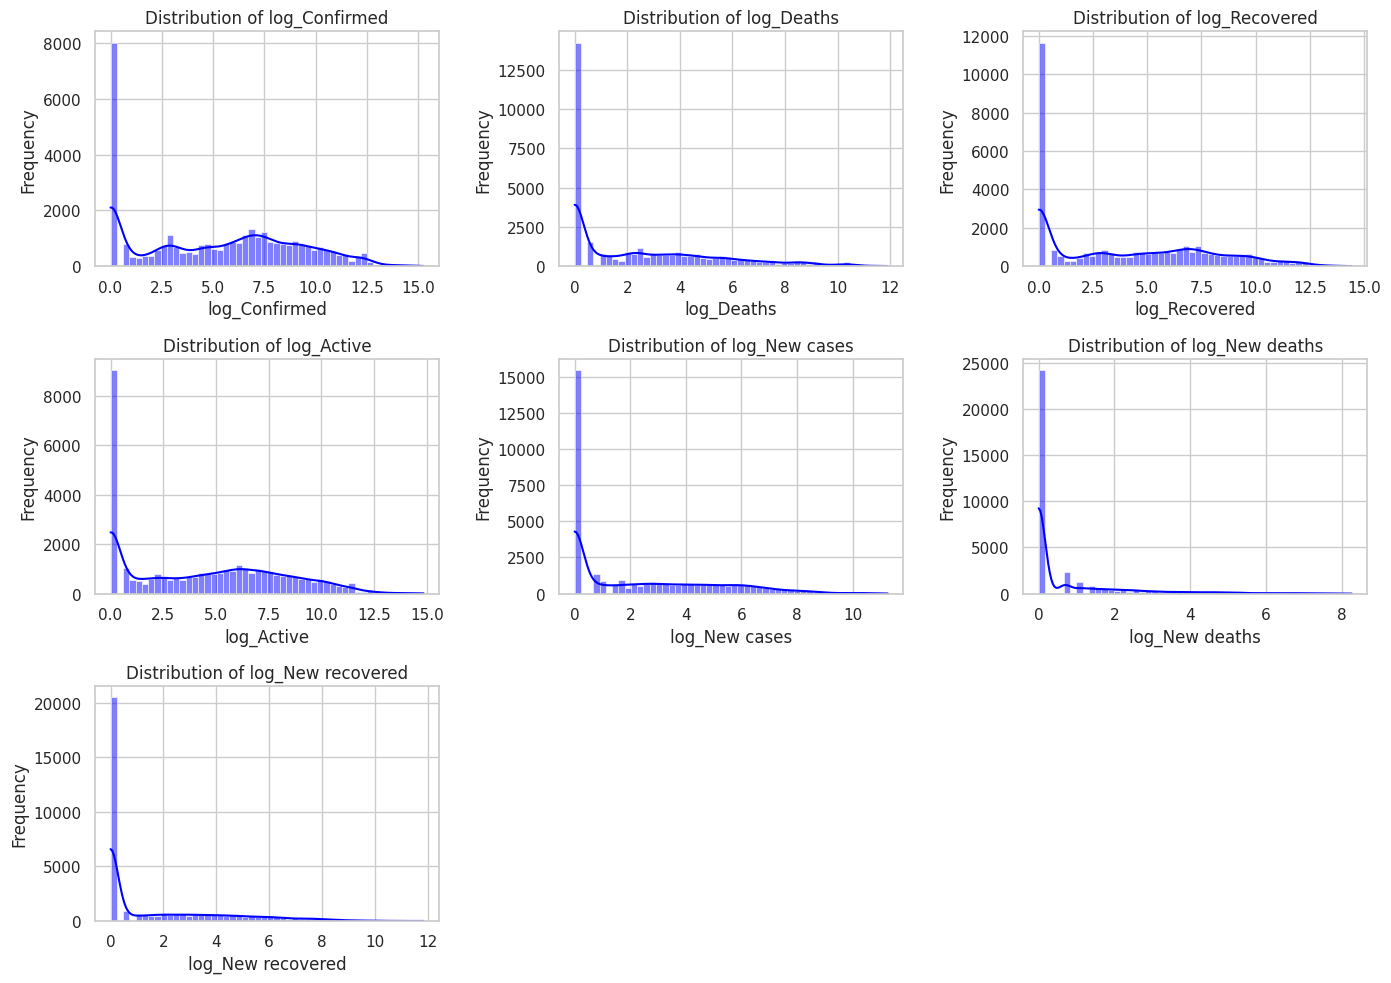

In [37]:
# List of numerical columns in the dataset
numerical_columns = ['log_Confirmed', 'log_Deaths', 'log_Recovered', 'log_Active', 'log_New cases', 'log_New deaths', 'log_New recovered']

# Set the figure size
plt.figure(figsize=(14, 10))

# Loop through the numerical columns and plot their histograms
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  # 3 rows, 3 columns of subplots
    sns.histplot(df_covid[col], kde=True, color='blue', bins=50)  # You can adjust the number of bins as needed
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

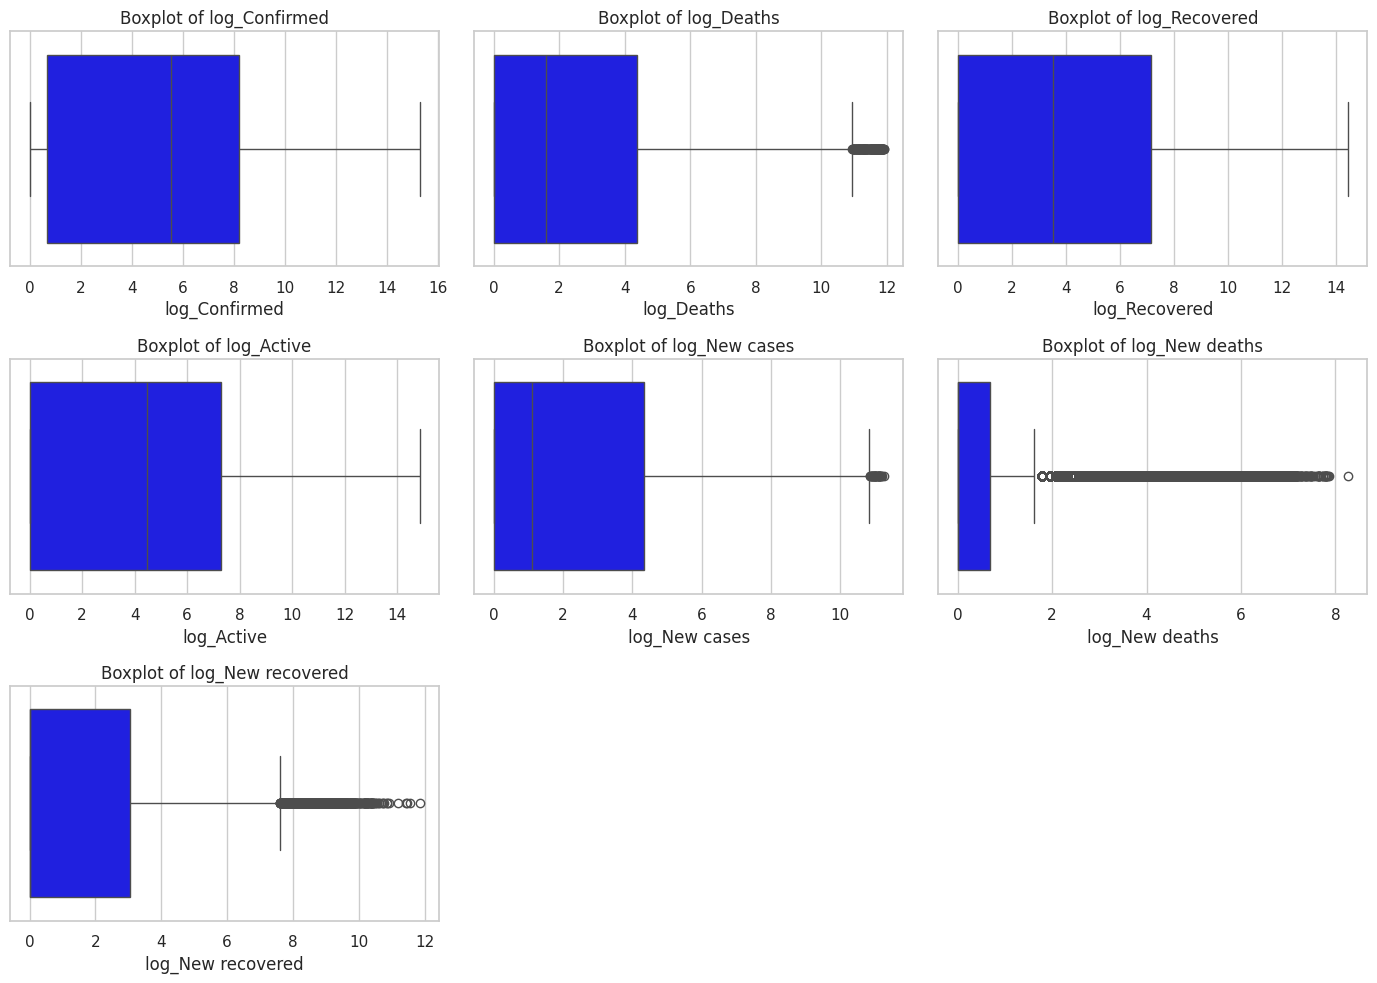

In [44]:
# Boxplots for all numerical variables to check for outliers
plt.figure(figsize=(14, 10))

# Loop through numerical columns and create boxplots
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df_covid[col], color='blue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [39]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error

column = 'log_New cases'
series = df_covid[column]

# Check for stationarity with ADF test
adf_test = adfuller(series)
adf_result = {
    'ADF Statistic': adf_test[0],
    'p-value': adf_test[1],
    'Critical Values': adf_test[4],
    'Stationary': adf_test[1] < 0.05
}

# If non-stationary, difference the data
if not adf_result['Stationary']:
    series_diff = series.diff().dropna()
else:
    series_diff = series


print("ADF Test Results:")
print(adf_result)

ADF Test Results:
{'ADF Statistic': -4.305278591513035, 'p-value': 0.0004349550656067334, 'Critical Values': {'1%': -3.4305363025455717, '5%': -2.861622341128934, '10%': -2.5668138275937}, 'Stationary': True}


In [40]:
model = ARIMA(series_diff, order=(1, 1, 1))
model_fit = model.fit()

# Generate forecasts
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)
print(forecast)

35156    3.935871
35157    3.783807
35158    3.766379
35159    3.764382
35160    3.764153
35161    3.764127
35162    3.764124
35163    3.764123
35164    3.764123
35165    3.764123
35166    3.764123
35167    3.764123
35168    3.764123
35169    3.764123
35170    3.764123
35171    3.764123
35172    3.764123
35173    3.764123
35174    3.764123
35175    3.764123
35176    3.764123
35177    3.764123
35178    3.764123
35179    3.764123
35180    3.764123
35181    3.764123
35182    3.764123
35183    3.764123
35184    3.764123
35185    3.764123
Name: predicted_mean, dtype: float64


In [41]:
print("\nARIMA Model Summary:")
print(model_fit.summary())


ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:          log_New cases   No. Observations:                35156
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -78869.824
Date:                Mon, 02 Dec 2024   AIC                         157745.648
Time:                        12:15:08   BIC                         157771.051
Sample:                             0   HQIC                        157753.738
                              - 35156                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1146      0.005     24.904      0.000       0.106       0.124
ma.L1         -0.9977      0.000  -2534.195      0.000      -0.998      -0.997
sigma2         5.2015      0.0

In [42]:
# Calculate RMSE for in-sample prediction
rmse = np.sqrt(mean_squared_error(df_covid['log_New cases'], model_fit.predict()))  # Use model_fit.predict() instead of model.predict()
print(f'RMSE: {rmse}')

RMSE: 2.280654448598319


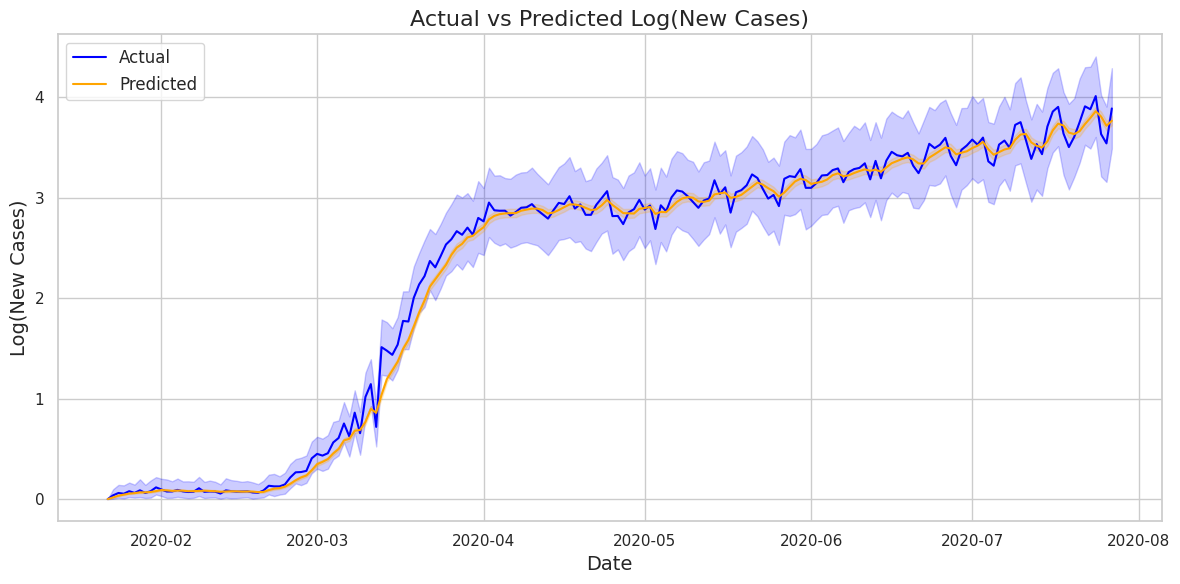

In [43]:
#plot a graph to show the model performance using seaborn
sns.set_theme(style="whitegrid")

# Create the figure and axes
plt.figure(figsize=(12, 6))

# Plot the actual values
sns.lineplot(x=df_covid['Date'], y=df_covid['log_New cases'], label='Actual', color='blue')

# Plot the predicted values
sns.lineplot(x=df_covid['Date'], y=model_fit.predict(), label='Predicted', color='orange')

# Add labels, title, and legend
plt.title("Actual vs Predicted Log(New Cases)", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Log(New Cases)", fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

###Observations

Good Fit:

The predicted values (orange line) closely follow the actual values (blue line), indicating the ARIMA(1, 1, 1) model captures the trends and patterns well.
This is a sign of a well-calibrated model for forecasting.

Confidence Intervals:

Early in the timeline, the intervals are narrow, reflecting lower uncertainty.
As time progresses, the intervals widen, especially towards the later dates. This is expected as future predictions typically carry more uncertainty.

Seasonal and Trend Patterns:

Both lines rise and fall together, reflecting consistent model performance in capturing underlying trends (e.g., exponential growth in "New Cases" early on, followed by a plateau).


# Interpretation of Model Performance
High Agreement:

The close alignment between actual and predicted lines suggests that the model is effectively capturing the dynamics of the data.

Uncertainty:

While confidence intervals widen over time, the predictions remain largely within the bounds, which reinforces the model's reliability for short-term forecasting.